In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_cj_file(file_path):
    '''
    Function to load the CityJSON file
    '''
    with open(file_path, 'r') as file: # Open the file specified by file_path in read mode ('r')
        cj = json.load(file) # Use the json.load() function to parse the JSON content from the file object and store it in the variable 'cj'.
    return cj

In [4]:
def buildings_heights(cj):
    '''
    Function to generate a dictionary of buildings and building parts with their ids and heights
    Input: cityjson
    Output: a dictionary with building ids and heights
    '''
    bd_heights = {} # Initialize an empty dictionary called bd_heights to store building IDs and their corresponding heights.

    for id, feature in cj['CityObjects'].items(): # Iterate through each item in the 'CityObjects' dictionary of the CityJSON object. And 'id' represents the key (object ID) and 'feature' represents the value (object data).
        if feature['type'] in ['Building', 'BuildingPart']: # Check if the 'type' of the feature is either 'Building' or 'BuildingPart'.
            if 'attributes' in feature and 'measuredHeight' in feature['attributes']: # Check if the feature contains 'attributes' and if 'measuredHeight' is present in the attributes.
                bd_heights[id] = feature['attributes']['measuredHeight'] # If 'measuredHeight' is found, add it to the bd_heights dictionary with the feature's ID as the key.
            else:
                bd_heights[id] = None

    return bd_heights

In [5]:
def height_distribution(bd_heights):
    '''
    Function to generate the height distribution according to the building heights
    Input: the dictionary of building ids and heights
    Output: a pandas dataframe of height categories and numbers of buildings in each category
            The categories are: '0-10m', '10-20m', '20-30m', '30m+'
    '''
    # Convert the dictionary to a pandas DataFrame for easier manipulation
    df_heights = pd.DataFrame(list(bd_heights.items()), columns=['Building ID', 'Height']) # Each item in the dictionary becomes a row in the DataFrame with columns 'Building ID' and 'Height'.

    bins = [0, 10, 20, 30, float('inf')] # Define the bins for categorizing building heights. The bins are: 0-10 meters, 10-20 meters, 20-30 meters, and 30 meters and above (infinity).

    labels = ['0-10m', '10-20m', '20-30m', '30m+'] # Define the labels for each bin category.

    df_heights['Height Category'] = pd.cut(df_heights['Height'], bins=bins, labels=labels, right=False)
    # Use the pandas cut function to categorize the 'Height' column into the defined bins.
    # Create a new column 'Height Category' with the corresponding category labels.

    category_series = df_heights['Height Category'] # Get the 'Height Category' column as a Series
    category_counts = category_series.value_counts() # Count occurrences of each category
    height_dist = category_counts.reset_index() # Convert counts to a DataFrame and reset the index
    height_dist.columns = ['Height Category', 'Number of Buildings'] # Rename columns for clarity

    return height_dist

In [6]:
def pie_chart(hd):
    '''
    Function to generate a pie chart according to the height distribution
    Input: height distribution
    The function is to show the pie chart (or save the pie chart as a PNG file, optional)
    '''
    plt.figure(figsize=(8, 6)) # Create a new figure for the pie chart with a specified size
    plt.pie(hd['Number of Buildings'], labels=hd['Height Category'], autopct='%1.1f%%', startangle=140)
    # Generate the pie chart
    # Data for the pie chart (number of buildings in each height category)
    # Labels for each slice of the pie chart (height categories)
    # Format for displaying percentages on the pie chart
    # Start the pie chart at a 140-degree angle for better visualization


    plt.title('Distribution of Building Heights') # Set the title of the pie chart

    # Display the pie chart
    plt.show()

In [7]:
def main(file_path):
    '''
    Main integrated function
    Input: file path of the CityJSON
    The function is to show the pie chart (or save the pie chart as a PNG file, optional)
    '''
    city_json = load_cj_file(file_path) # Load the CityJSON file using the provided file path

    bd_heights = buildings_heights(city_json)  # Extract building heights from the CityJSON data

    height_dist = height_distribution(bd_heights) # Generate the height distribution based on the building heights

    pie_chart(height_dist) # Create and display the pie chart based on height distribution

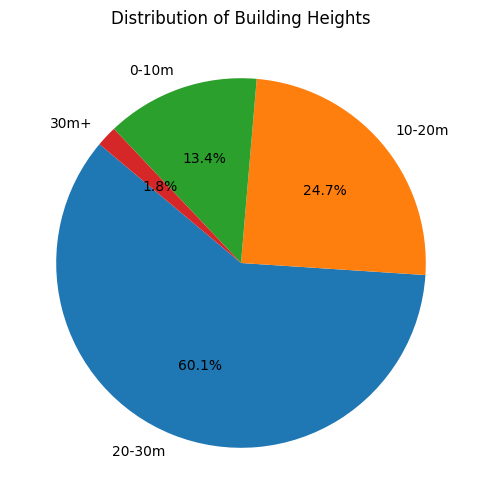

In [8]:
if __name__ == "__main__":
    vienna = '/content/drive/My Drive/duy-master/Computational-Representation-in-Built-Environment/Assignment/part_4/Vienna_102081_v20.city.json'  # Replace the file path with your own
    main(vienna)